In [13]:
import numpy as np;
import matplotlib.pyplot as pp

In [14]:
def steepest_descent(A,b,x0,r_tol=1e-12,NMAX=100):
    r = b - A.dot(x0)
    x=x0.copy()
    n=len(r)
    count = 0
    hist = []
    def J(x):
        return x.dot(A.dot(x)/2-b)
    while True:
        
        hist.append(x.copy())
        r_size = np.sqrt(r.dot(r))/n
        print(r_size)
        if r_size < r_tol:
            break
        if count>NMAX:
            raise Exception("Exceeded iteration count")
        count += 1
        
        d = r
        q = A.dot(d)
        alpha = d.dot(r)/d.dot(q)
        
        x += alpha*d
        r -= alpha*q
    return (hist,x)


In [15]:
A = np.array([[2,2],[2,3]])
x0 = np.array([1.0,1.0])
b = np.array([1,-1])

def J(x,y):
    p = np.array([x,y])
    return p.dot(A.dot(p))/2-p.dot(b)

x = np.linspace(0, 4,1000)
y = np.linspace(-3, 1, 1000)

(XX,YY) = np.meshgrid(x,y)
ZZ  = np.vectorize(J)(XX,YY)


3.3541019662496847
0.6098367211363064
0.8131156281817412
0.14783920512395274
0.19711894016526987
0.03583980730277616
0.04778640973703474
0.008688438134006254
0.01158458417867498
0.0021062880324863487
0.002808384043315123
0.0005106152806027453
0.0006808203741369916
0.00012378552257036107
0.00016504736342714713
3.0008611532208144e-05


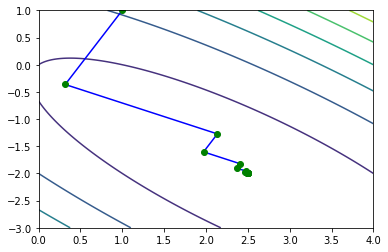

In [16]:
(hist,x) = steepest_descent(A,b,x0, r_tol = 1e-4)

    
for k in range(len(hist)-1):
    pp.plot( [ hist[k][0],hist[k+1][0] ], (hist[k][1], hist[k+1][1]),'b' )
for p in hist:
    pp.plot(*p,'go')

pp.contour(XX,YY,ZZ)

In [ ]:
len(hist)

In [17]:
A = np.array([[5,4.99],[4.99,5]])
x0 = np.array([1.0,1.0])
b = np.array([1,-1])

def J(x,y):
    p = np.array([x,y])
    return p.dot(A.dot(p))/2-p.dot(b)

x = np.linspace(0,110,1000)
y = np.linspace(-110,0, 1000)

(XX,YY) = np.meshgrid(x,y)
ZZ  = np.vectorize(J)(XX,YY)



7.099299261194727
0.7099220942062825
6.4415151379022015
0.6441444075413567
5.844677868226784
0.5844613390018576
5.303140433892603
0.5303081929899566
4.811779039948731
0.4811725956631316
4.3659446356195435
0.4365896470726064
3.961418926979269
0.3961375224794155
3.5943744652645617
0.3594334812296461
3.261338433195558
0.3261302454265103
2.9591597866683235
0.29591271413583625
2.6849794409269725
0.26849498203615374
2.436203219129679
0.24361763430516925
2.210477307360226
0.2210452921479762
2.005665983850102
0.20056438574384186
1.819831411695142
0.18198113354015993
1.651215303873782
0.16511970877450927
1.498222287089358
0.14982057587723463
1.359404807032268
0.13593898101430887
1.2334494322418392
0.12334358248863514
1.119164426981172
0.1119152080412419
1.0154684755447059
0.10154572729447399
0.9213804513127382
0.09213702866873762
0.8360101337521902
0.08360009109281111
0.758549785531669
0.0758541417246473
0.6882665100573017
0.06882589171338387
0.6244953171193839
0.062448842771669594
0.5666328310

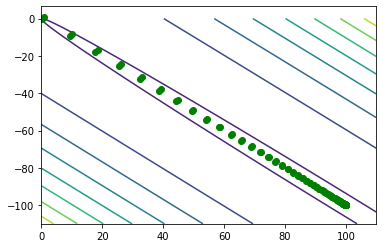

In [18]:
(hist,x) = steepest_descent(A,b,x0, r_tol = 1e-4,NMAX=1000)

for p in hist:
    pp.plot(*p,'go')
    
pp.contour(XX,YY,ZZ)

In [7]:
len(hist)

186

In [19]:
def cg(A,b,x0,r_tol=1e-12,NMAX=1000):
    x=x0.copy()
    n=len(b)
    count = 0
    hist = []
    def J(x):
        return x.dot(A.dot(x)/2-b)

    r = b - A.dot(x)
    d = r
    while True:
        
        hist.append(x.copy())
        r_size = np.sqrt(r.dot(r))/n
        print(r_size)
        if r_size < r_tol:
            break
        if count>NMAX:
            raise Exception("Exceeded iteration count")
        count += 1
        
        q = A.dot(d)
        alpha = d.dot(r)/d.dot(q)
    
        x += alpha*d
        r_next = r - alpha*q
        beta = r_next.dot(r_next)/r.dot(r)
        d = r_next + beta * d
        r = r_next
        
    return (hist,x)



In [20]:
A = np.array([[2,2],[2,3]])
x0 = np.array([1.0,1.0])
b = np.array([1,-1])

def J(x,y):
    p = np.array([x,y])
    return p.dot(A.dot(p))/2-p.dot(b)

x = np.linspace(0, 4,1000)
y = np.linspace(-3, 1, 1000)

(XX,YY) = np.meshgrid(x,y)
ZZ  = np.vectorize(J)(XX,YY)



3.3541019662496847
0.6098367211363064
1.4475537224895361e-15


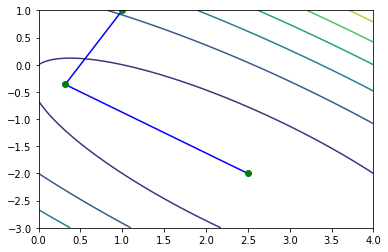

In [21]:
(hist,x) = cg(A,b,x0, r_tol = 1e-4)

for k in range(len(hist)-1):
    pp.plot( [ hist[k][0],hist[k+1][0] ], (hist[k][1], hist[k+1][1]),'b' )
for p in hist:
    pp.plot(*p,'go')

pp.contour(XX,YY,ZZ)

In [22]:
A = np.array([[5,4.99],[4.99,5]])
x0 = np.array([1.0,1.0])
b = np.array([1,-1])

def J(x,y):
    p = np.array([x,y])
    return p.dot(A.dot(p)/2)-p.dot(b)

x = np.linspace(0,110,1000)
y = np.linspace(-110,0, 1000)

(XX,YY) = np.meshgrid(x,y)
ZZ  = np.vectorize(J)(XX,YY)



7.099299261194727
0.7099220942062825
1.0006591954772493e-12
1.960651030822308e-16


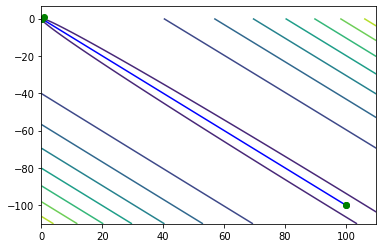

In [23]:
(hist,x) = cg(A,b,x0, r_tol = 1e-12)

for k in range(len(hist)-1):
    pp.plot( [ hist[k][0],hist[k+1][0] ], (hist[k][1], hist[k+1][1]),'b' )
for p in hist:
    pp.plot(*p,'go')
    
pp.contour(XX,YY,ZZ)

In [ ]:
x

In [ ]:
A.dot(x)